In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For Classification
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# For Splitting, Standardizing and encoding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

# For accuracy
from sklearn import metrics

# For warning
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
train_df = pd.read_csv('train_HR_analytics.csv')
test_df = pd.read_csv('test_HR_analytics.csv')

In [3]:
print(train_df.shape)
train_df.head(10)

(54808, 14)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [4]:
print(test_df.shape)
test_df.head(10)

(23490, 13)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
5,46232,Procurement,region_7,Bachelor's,m,sourcing,1,36,3.0,2,0,0,68
6,54542,Finance,region_2,Bachelor's,m,other,1,33,5.0,3,1,0,57
7,67269,Analytics,region_22,Bachelor's,m,sourcing,2,36,3.0,3,0,0,85
8,66174,Technology,region_7,Master's & above,m,other,1,51,4.0,11,0,0,75
9,76303,Technology,region_22,Bachelor's,m,sourcing,1,29,5.0,2,1,0,76


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
employee_id             23490 non-null int64
department              23490 non-null object
region                  23490 non-null object
education               22456 non-null object
gender                  23490 non-null object
recruitment_channel     23490 non-null object
no_of_trainings         23490 non-null int64
age                     23490 non-null int64
previous_year_rating    21678 non-null float64
length_of_service       23490 non-null int64
KPIs_met >80%           23490 non-null int64
awards_won?             23490 non-null int64
avg_training_score      23490 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [7]:
train_df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
test_df.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [9]:
train_df['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

Text(0, 0.5, 'Count')

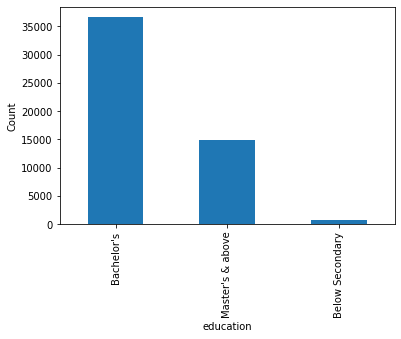

In [10]:
train_df['education'].value_counts().plot.bar()
plt.xlabel('education')
plt.ylabel('Count')

In [11]:
train_df['education'] = train_df['education'].replace(np.nan, "Bachelor's")

In [12]:
train_df['education'].isnull().sum()

0

In [13]:
train_df['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

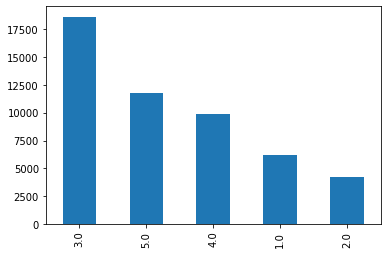

In [14]:
train_df['previous_year_rating'].value_counts().plot.bar()

In [15]:
train_df['previous_year_rating'] = train_df['previous_year_rating'].replace(np.nan, 3.0)

In [16]:
train_df['previous_year_rating'].isnull().sum() 

0

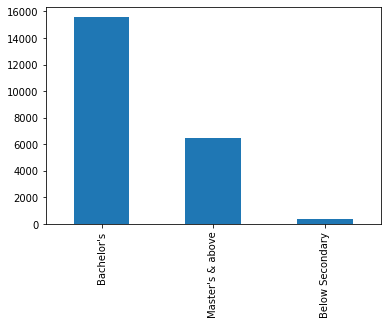

In [17]:
test_df['education'].value_counts().plot.bar()

In [18]:
test_df['education'] = test_df['education'].replace(np.nan, "Bachelor's")

In [19]:
test_df['education'].isnull().sum()

0

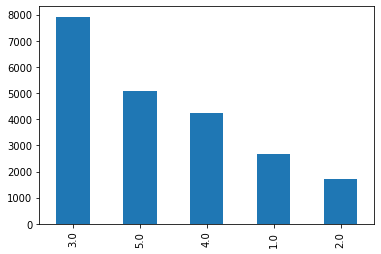

In [20]:
test_df['previous_year_rating'].value_counts().plot.bar()

In [21]:
test_df['previous_year_rating'] = test_df['previous_year_rating'].replace(np.nan, 3.0)

In [22]:
test_df['previous_year_rating'].isnull().sum() 

0

In [23]:
train_df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.304481,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.214770,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [24]:
train_df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [25]:
le = LabelEncoder()

In [26]:
train_df['employee_id'] = le.fit_transform(train_df['employee_id'])
train_df['department'] = le.fit_transform(train_df['department'])
train_df['region'] = le.fit_transform(train_df['region'])
train_df['education'] = le.fit_transform(train_df['education'])
train_df['gender'] = le.fit_transform(train_df['gender'])
train_df['recruitment_channel'] = le.fit_transform(train_df['recruitment_channel'])

In [27]:
test_df['employee_id'] = le.fit_transform(test_df['employee_id'])
test_df['department'] = le.fit_transform(test_df['department'])
test_df['region'] = le.fit_transform(test_df['region'])
test_df['education'] = le.fit_transform(test_df['education'])
test_df['gender'] = le.fit_transform(test_df['gender'])
test_df['recruitment_channel'] = le.fit_transform(test_df['recruitment_channel'])

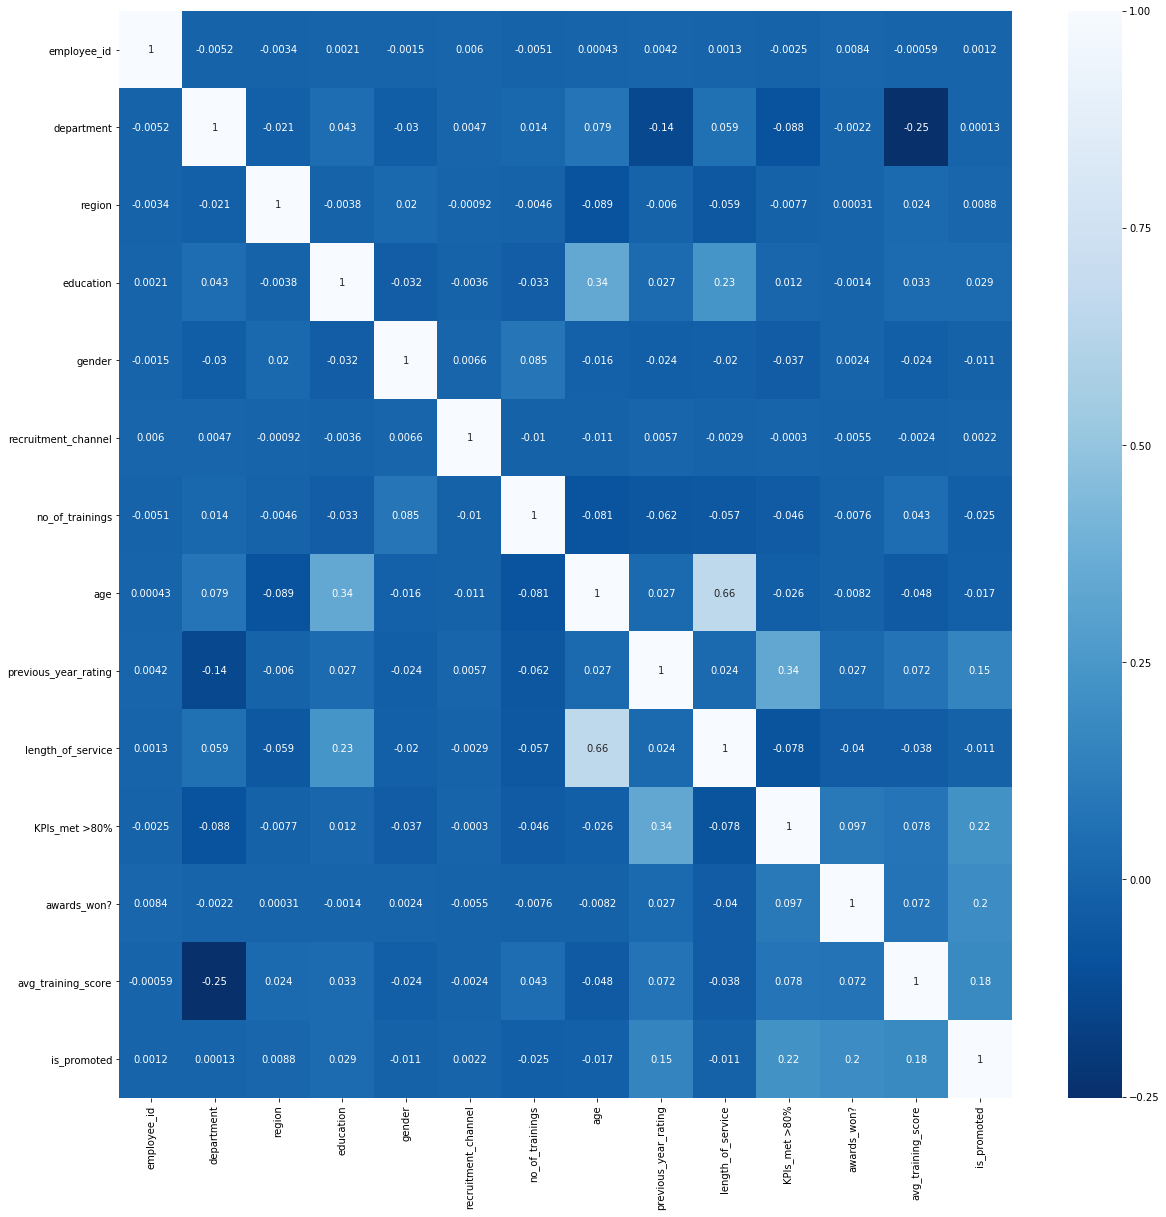

In [28]:
plt.figure(figsize = (20,20))
g = sns.heatmap(train_df.corr(), annot = True, cmap = 'Blues_r')
g

In [29]:
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,45805,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,45593,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,5247,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,1772,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,34270,8,18,0,1,0,1,45,3.0,2,0,0,73,0


In [30]:
test_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,2645,8,18,0,1,2,1,24,3.0,1,1,0,77
1,22351,2,28,0,0,0,1,31,3.0,5,0,0,51
2,21678,7,4,0,1,0,1,31,1.0,4,0,0,47
3,11618,5,11,0,0,0,3,31,2.0,9,0,0,65
4,19349,1,21,0,1,2,1,30,4.0,7,0,0,61


In [31]:
y = np.array(train_df['is_promoted'])
y = y.reshape(-1,1)

In [32]:
X = train_df.iloc[:, train_df.columns != 'is_promoted']

In [33]:
scaler = StandardScaler()

In [48]:
X1 = scaler.fit_transform(X)

In [49]:
from sklearn.decomposition import PCA

In [50]:
pca = PCA(n_components = 2)

In [52]:
principalcomponents = pca.fit_transform(X1)

In [53]:
principalDf = pd.DataFrame(data = principalcomponents 
             , columns = ['principal component 1', 'principal component 2'])

In [54]:
principalDf.head(10)

,principal component 1,principal component 2
0,1.004992,1.233865
1,-0.847136,0.263367
2,0.220821,-1.358057
3,0.850486,-2.425719
4,0.217600,-0.798606
5,-0.936395,0.468610
6,-0.466027,-0.472289
7,0.397692,-0.256036
8,-1.270870,1.065299
9,0.565893,1.091735


In [55]:
finalDf = pd.concat([principalDf, train_df[['is_promoted']]], axis = 1)

In [56]:
finalDf.head(10)

,principal component 1,principal component 2,is_promoted
0,1.004992,1.233865,0
1,-0.847136,0.263367,0
2,0.220821,-1.358057,0
3,0.850486,-2.425719,0
4,0.217600,-0.798606,0
5,-0.936395,0.468610,0
6,-0.466027,-0.472289,0
7,0.397692,-0.256036,0
8,-1.270870,1.065299,0
9,0.565893,1.091735,0


In [42]:
svm = SVC()

In [45]:
cross_val_score(svm, principalDf, train_df[['is_promoted']], cv = 3, n_jobs = -1, verbose = 2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.1min finished


array([0.91543514, 0.9152663 , 0.91543051])

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35)

In [59]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [61]:
svm.score(X_test, y_test)

0.9194599384872022

In [62]:
y_pred = svm.predict(X_test)

In [63]:
metrics.f1_score(y_test, y_pred)

0.16711590296495957

In [65]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     17512
           1       0.84      0.09      0.17      1671

    accuracy                           0.92     19183
   macro avg       0.88      0.55      0.56     19183
weighted avg       0.91      0.92      0.89     19183



In [64]:
test_df['is_promoted'] = svm.predict(test_df)

In [67]:
test_df['is_promoted'].unique()

array([0], dtype=int64)

In [69]:
test_df[['employee_id','is_promoted']].to_csv('SVM_submit2.csv', index = False)